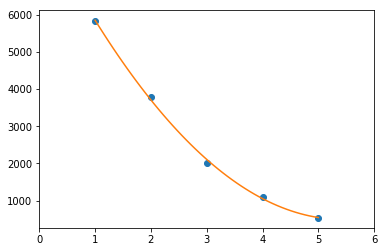

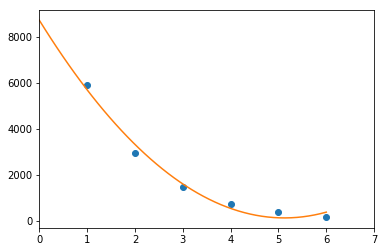

In [118]:
import numpy as np
import matplotlib.pyplot as plt
# get x and y vectors
x = [1, 2, 3, 4, 5]
y = [5828,	3774,	2017,	1103,	534]

# calculate polynomial
z = np.polyfit(x, y, 2)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0], x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()

# get x and y vectors
x = [1, 2, 3, 4, 5, 6]
start = 5928
y = [start,	start/2,	start/4,	start/8,	start/16, start/32]

# calculate polynomial
z = np.polyfit(x, y, 2)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x[0]-1, x[-1], 50)
y_new = f(x_new)

plt.plot(x,y,'o', x_new, y_new)
plt.xlim([x[0]-1, x[-1] + 1 ])
plt.show()


[  272.35714286 -2415.32857143  5847.71428571]


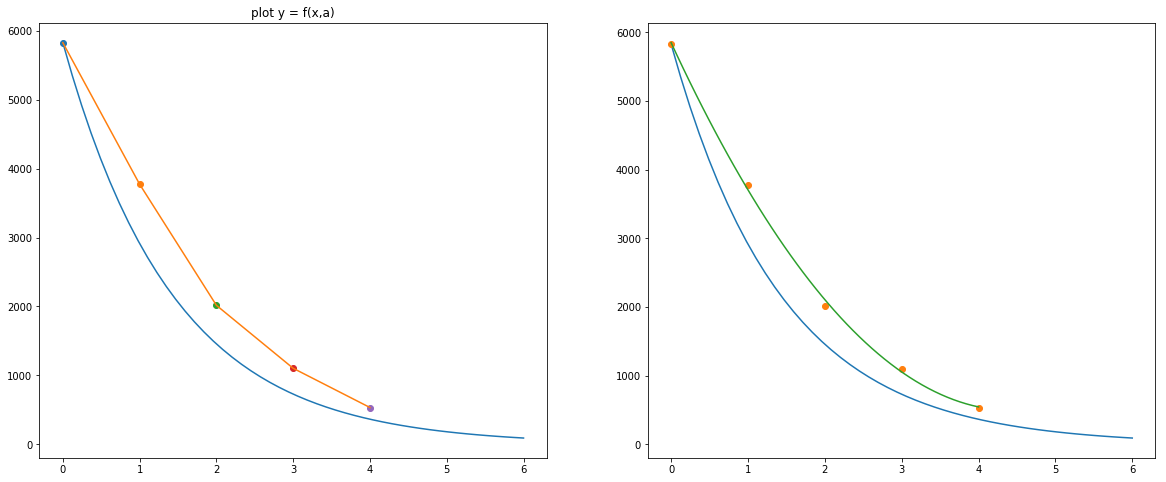

In [102]:
import matplotlib.pyplot as plt
import numpy as np

#define the function
f = lambda x,a : a * (1/2)**x

#set values
a=5828
x = np.linspace(0, 6)

#calculate the values of the function at the given points
y =  f(x,a)
y2 = np.log10(y)
# y and y2 are now arrays which we can plot
x_p = [0, 1, 2, 3, 4]
y_p = [5828,	3774,	2017,	1103,	534]

x_result = [0, 1, 2, 3, 4]
y_result = [5828,	3774,	2017,	1103,	534]
#plot the resulting arrays
fig, ax = plt.subplots(1,2, figsize=(20,8))

ax[1].plot(x,y)

ax[0].scatter(x_p[0], y_p[0])
ax[0].scatter(x_p[1], y_p[1])
ax[0].scatter(x_p[2], y_p[2])
ax[0].scatter(x_p[3], y_p[3])
ax[0].scatter(x_p[4], y_p[4])

ax[0].set_title("plot y = f(x,a)")
ax[0].plot(x,y) # .. "plot f"

ax[0].plot(x_result,y_result) # .. "plot f"

# get x and y vectors
x_res = [0, 1, 2, 3, 4]
y_res = [5828,	3774,	2017,	1103,	534]

# calculate polynomial
z = np.polyfit(x_res, y_res, 2)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(x_res[0], x_res[-1], 50)
y_new = f(x_new)

ax[1].plot(x_res,y_res,'o', x_new, y_new)

plt.show()

In [0]:
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

In [112]:
predictions = [5828,	3774,	2017,	1103,	534]
start = 5928
targets = [start,	start/2,	start/4,	start/8,	start/16]
print(targets)
method_1_rmse = rmse(np.array(predictions), np.array(targets))
method_1_rmse_norm = student_rmse/(max(predictions)-min(predictions))
method_1_rmse_norm

[5928, 2964.0, 1482.0, 741.0, 370.5]


0.0890045803175854

In [117]:
# get x and y vectors
x_res = [0, 1, 2, 3, 4]
y_res = [5828,	3774,	2017,	1103,	534]

# calculate polynomial
z = np.polyfit(x_res, y_res, 2)
f = np.poly1d(z)
predictions_2 = [5828,	3774,	2017,	1103,	534]
targets_2 = list(map(f, x_res))
print(targets_2, predictions_2)
method_2_rmse = rmse(np.array(predictions_2), np.array(targets_2))
method_2_rmse_norm = method_2_rmse/(max(predictions_2)-min(predictions_2))
method_2_rmse_norm

[5847.714285714285, 3704.7428571428527, 2106.485714285708, 1052.9428571428525, 544.114285714285] [5828, 3774, 2017, 1103, 534]


0.010618720005286795

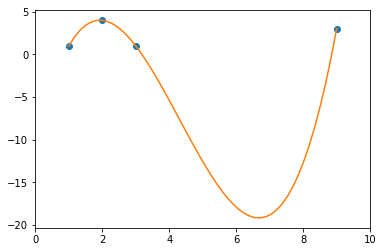

In [7]:
import numpy, scipy, matplotlib
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

# power law function
def func_power_law(x,a,b,c):
    return a*(x**b)+c

test_X = [1.0,2,3,4,5]
test_Y = [5828,	3774,	2017,	1103,	534]

# {'1x': [5981.0, 6366.0, 6568.0, 6402.5, 6416.0, 6463.0, 6422.0, 6360.5],
#  '2x': [3774.0, 4137.0, 4156.0, 4183.0, 4104.0, 4226.0, 4121.0, 3842.0],
#  '4x': [2017.0, 2210.0, 2269.0, 2355.0, 2330.0, 2285.0, 2327.0, 2256.0],
#  '8x': [1103.0, 1211.0, 1254.0, 1276.0, 1277.0, 1259.0, 1305.0, 1236.0],
#  '16x': [534.0, 602.0, 638.0, 616.0, 635.0, 616.0, 661.0, 650.0]}

# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = func_power_law(test_X, *parameterTuple)
    return numpy.sum((test_Y - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(test_X)
    minX = min(test_X)
    maxY = max(test_Y)
    minY = min(test_Y)
    maxXY = max(maxX, maxY)

    parameterBounds = []
    parameterBounds.append([-maxXY, maxXY]) # seach bounds for a
    parameterBounds.append([-maxXY, maxXY]) # seach bounds for b
    parameterBounds.append([-maxXY, maxXY]) # seach bounds for c

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x

# generate initial parameter values
geneticParameters = generate_Initial_Parameters()

# curve fit the test data
fittedParameters, pcov = curve_fit(func_power_law, test_X, test_Y, geneticParameters)

print('Parameters', fittedParameters)

modelPredictions = func_power_law(test_X, *fittedParameters) 

absError = modelPredictions - test_Y

SE = numpy.square(absError) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(absError) / numpy.var(test_Y))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

print()


##########################################################
# graphics output section
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(test_X, test_Y,  'D')

    # create data for the fitted equation plot
    xModel = numpy.linspace(min(test_X), max(test_X))
    yModel = func_power_law(xModel, *fittedParameters)

    # now the model as a line plot
    axes.plot(xModel, yModel)

    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)